In [222]:
import matplotlib.pyplot as plt
import itertools
import sys
sys.path.append('../../mainstream/src/scheduler')
sys.path.append('../../mainstream/data')
import scheduler_util
plot_folder = "../plots/stems/"

In [223]:
num_frozens = [33,45,51,39]
fpses = [7,7,6,7]
# app_configs = [
# #     (15, 10),
# #     (8, 7),
#     (3, 12),
#     (45, 3),
#     (51, 1),
# ]
app_configs = zip(num_frozens, fpses)

In [224]:
# Automatically calculate stem from app_configs
curr = None
stem = []
for num_frozen, fps in sorted(app_configs, key=lambda x: (x[1], x[0]), reverse=True):
    if curr is None or fps < curr:
        stem.append((num_frozen, fps))
        curr = fps
stem

[(45, 7), (51, 6)]

In [225]:
fps_options = range(1, 15+1)
chokepoints = [3, 33, 39, 45, 51, 57, 63, 69, 75, 81]

options = list(itertools.product(chokepoints, fps_options))

def prep_stem(stem_):
    stem_lookup_ = {}
    stem_dct = dict(stem_)
    last = stem_[0][1]
    for num_frozen in chokepoints:
        if num_frozen in stem_dct:
            last = stem_dct[num_frozen]
        stem_lookup_[num_frozen] = last
        if num_frozen == max(stem_dct):
            last = 0
    plt_stem_ = [(0, stem_[0][1])] + stem_ + [(stem_[-1][0], 0)]
    return plt_stem_, stem_lookup_

plt_stem, stem_lookup = prep_stem(stem)
filtered_options = [(num_frozen, fps) for num_frozen, fps in options if stem_lookup[num_frozen] >= fps]

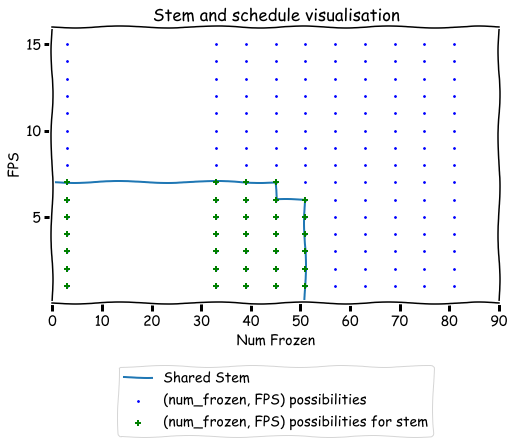

In [343]:
plt.xkcd()
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)

def savefig(plot_id_):
    leg = ax.legend(loc="upper center", bbox_to_anchor=(.5,-.2))
    fig.subplots_adjust(bottom=0.4) 
#     plt.tight_layout()
    plt.savefig(plot_folder + plot_id_ + ".png", dpi=600)
    fig.savefig(plot_folder + plot_id_ + "_preview.jpg", dpi=72, bbox_extra_artists=(leg,), bbox='tight')
    
plt.ylabel("FPS")
plt.xlabel("Num Frozen")
plt.title("Stem and schedule visualisation")
plt.ylim(0, 16)
plt.yticks([5, 10, 15])
plt.xlim(0, 90)

ax.step(*zip(*plt_stem), zorder=1, label='Shared Stem')
savefig("stemviz_0_stem_only")

ax.scatter(*zip(*options), s=3, c='blue', zorder=2, label='(num_frozen, FPS) possibilities')
savefig("stemviz_1_app_possible")

ax.scatter(*zip(*filtered_options), marker='+', c='green', zorder=3, label='(num_frozen, FPS) possibilities for stem')
savefig("stemviz_2a_possible_for_stem")

plt.show()

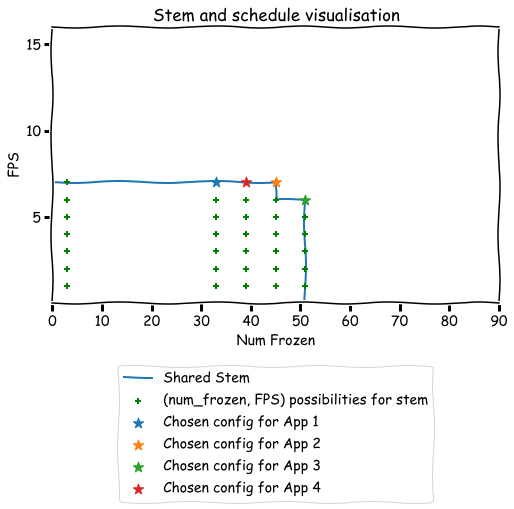

In [344]:
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)

plt.ylabel("FPS")
plt.xlabel("Num Frozen")
plt.title("Stem and schedule visualisation")
plt.ylim(0, 16)
plt.yticks([5, 10, 15])
plt.xlim(0, 90)

ax.step(*zip(*plt_stem), zorder=1, label='Shared Stem')

ax.scatter(*zip(*filtered_options), marker='+', c='green', zorder=3, label='(num_frozen, FPS) possibilities for stem')
savefig("stemviz_2b_possible_for_stem_alone")

for i, (x, y) in enumerate(app_configs):
    ax.scatter([x], [y], marker='*', zorder=3, s=120, label='Chosen config for App ' + str(i+1))
savefig("stemviz_3_chosen_schedule")

plt.show()

In [227]:
stem_delta = [
    (45, 7),
    (51, 6),
    (57, 2),
]
# stem_delta = [
#     (10, 15),
#     (20, 12),
#     (33, 10),
#     (75, 4),
# ]
plt_stem2, stem_lookup2 = prep_stem(stem_delta)
filtered_options2 = [(num_frozen, fps) for num_frozen, fps in options if stem_lookup2[num_frozen] >= fps]

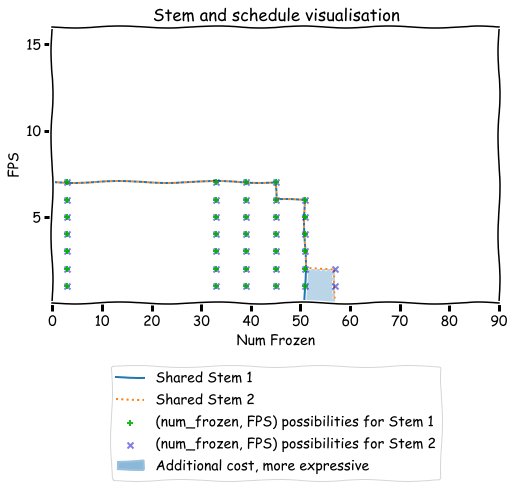

In [338]:
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(111)
plt.ylabel("FPS")
plt.xlabel("Num Frozen")
plt.title("Stem and schedule visualisation")
plt.ylim(0, 16)
plt.yticks([5, 10, 15])
plt.xlim(0, 90)

plt.step(*zip(*plt_stem), zorder=1, label='Shared Stem 1')

plt.step(*zip(*plt_stem2), linestyle=':', zorder=2, label='Shared Stem 2')

plt.scatter(*zip(*filtered_options), marker='+', c=(0, .7, 0, .9), zorder=4, label='(num_frozen, FPS) possibilities for Stem 1')
# filtered_options2 = [x for x in filtered_options2 if x not in set(filtered_options)]
plt.scatter(*zip(*filtered_options2), marker='x', c=(0, 0, .8, .5), zorder=3, label='(num_frozen, FPS) possibilities for Stem 2')

plt.fill_between(chokepoints, [stem_lookup[x] for x in chokepoints], [stem_lookup2[x] for x in chokepoints], 
                 step='pre', alpha=.3, label='Additional cost, more expressive')
# plt.legend(loc="upper left", bbox_to_anchor=(1,1))

savefig("stemviz_4_dominates_relation")


plt.show()